<a href="https://colab.research.google.com/github/souvik25162/Time-Series-Analysis-and-forecasting/blob/master/Boston_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'1sgb3kHhvfAxJyBZ-s9njtw5bS11K6LKz'})
downloaded.GetContentFile('crime.xlsx')

In [4]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [5]:
df=pd.read_excel('crime.xlsx',encoding='latin-1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [6]:
import datetime

In [7]:
df['DATE']=pd.to_datetime(df['OCCURRED_ON_DATE']).dt.date

In [8]:
def createdf(c1,d1,c2,d2):
    dic = {c1:d1,c2:d2}
    df = pd.DataFrame(dic)
    return df

In [9]:
c = createdf("Date",df["DATE"].value_counts().index,"Count",df["DATE"].value_counts())

In [10]:
c.head()

,Date,Count
2016-09-01,2016-09-01,378
2017-09-01,2017-09-01,376
2018-06-15,2018-06-15,372
2017-09-22,2017-09-22,368
2017-08-04,2017-08-04,361


In [ ]:
##ts= pd.DataFrame(df["DATE"].value_counts(),df["DATE"].value_counts().index)
#ts.head()

In [ ]:
#ts.index=pd.to_datetime(ts.index)

In [ ]:
#ts=ts.rename(columns={'DATE':'count'})

In [ ]:
#ts.head()

In [11]:
c.index=pd.to_datetime(c.index)

In [12]:
Y=c['Count'].resample('MS').mean()

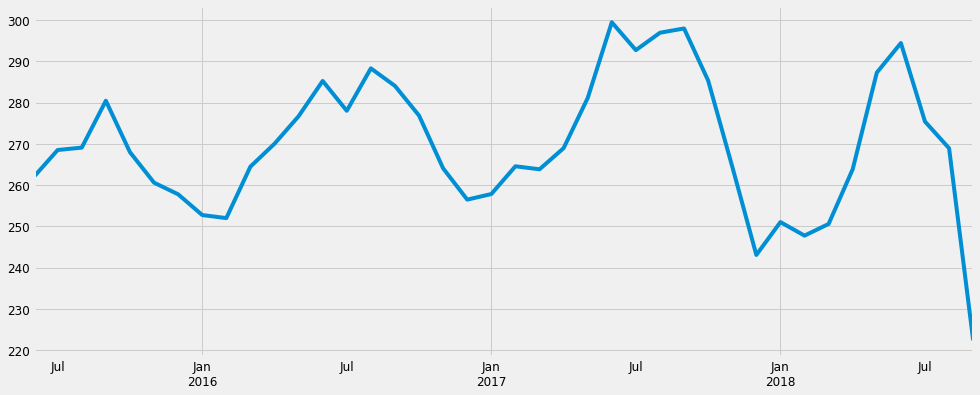

In [13]:
Y.plot(figsize=(15,6))
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot

In [15]:
d=c.sort_values(by="Date",ascending = True)

In [16]:
d.head()

,Date,Count
2015-06-15,2015-06-15,249
2015-06-16,2015-06-16,249
2015-06-17,2015-06-17,234
2015-06-18,2015-06-18,294
2015-06-19,2015-06-19,289


In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

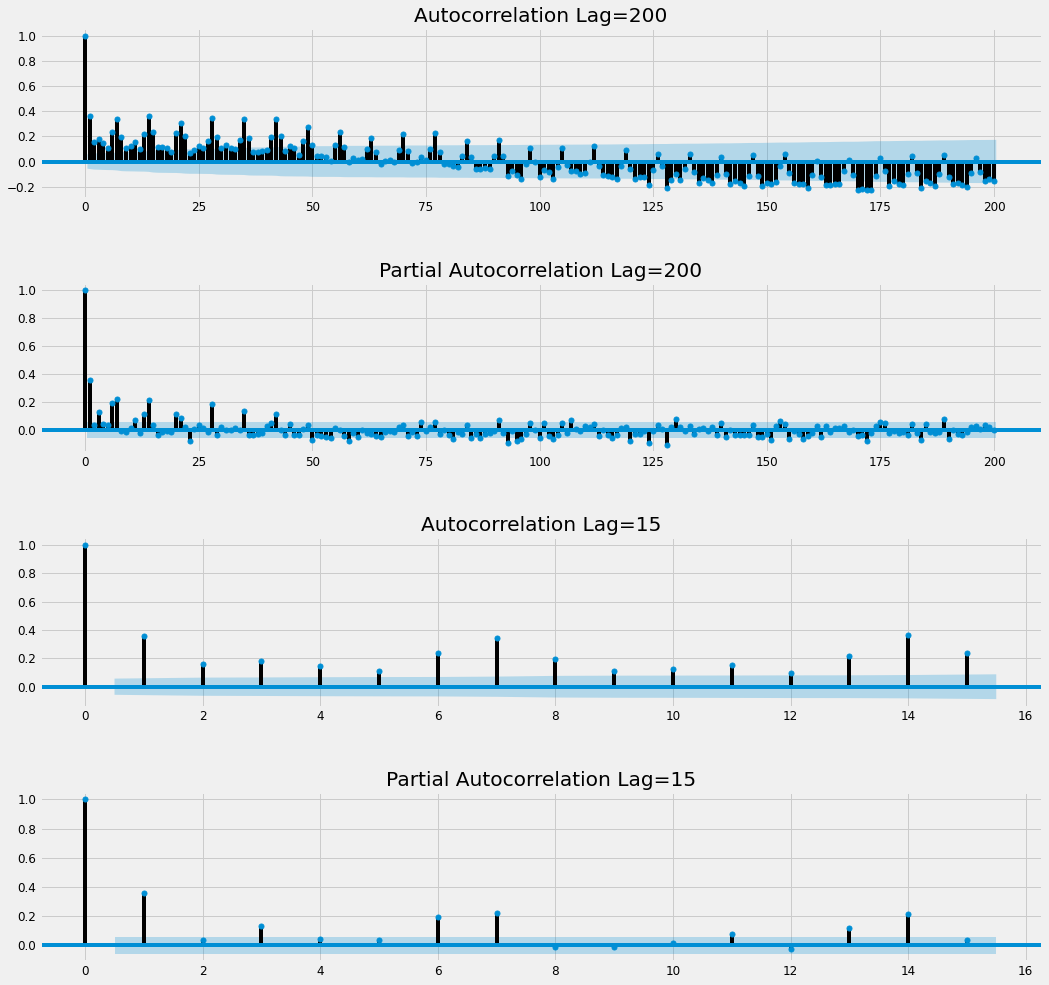

In [18]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(411)
fig = plot_acf(d["Count"],lags=200,ax=ax1)
plt.title('Autocorrelation Lag=200')
ax2 = fig.add_subplot(412)
fig = plot_pacf(d["Count"],lags=200,ax=ax2)
plt.title('Partial Autocorrelation Lag=200')
ax3 = fig.add_subplot(413)
fig = plot_acf(d["Count"],lags=15,ax=ax3)
plt.title('Autocorrelation Lag=15')
ax4 = fig.add_subplot(414)
fig = plot_pacf(d["Count"],lags=15,ax=ax4)
plt.title('Partial Autocorrelation Lag=15')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
plt.show()

In [19]:
import matplotlib.ticker as ticker
import statsmodels.api as sm
###from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

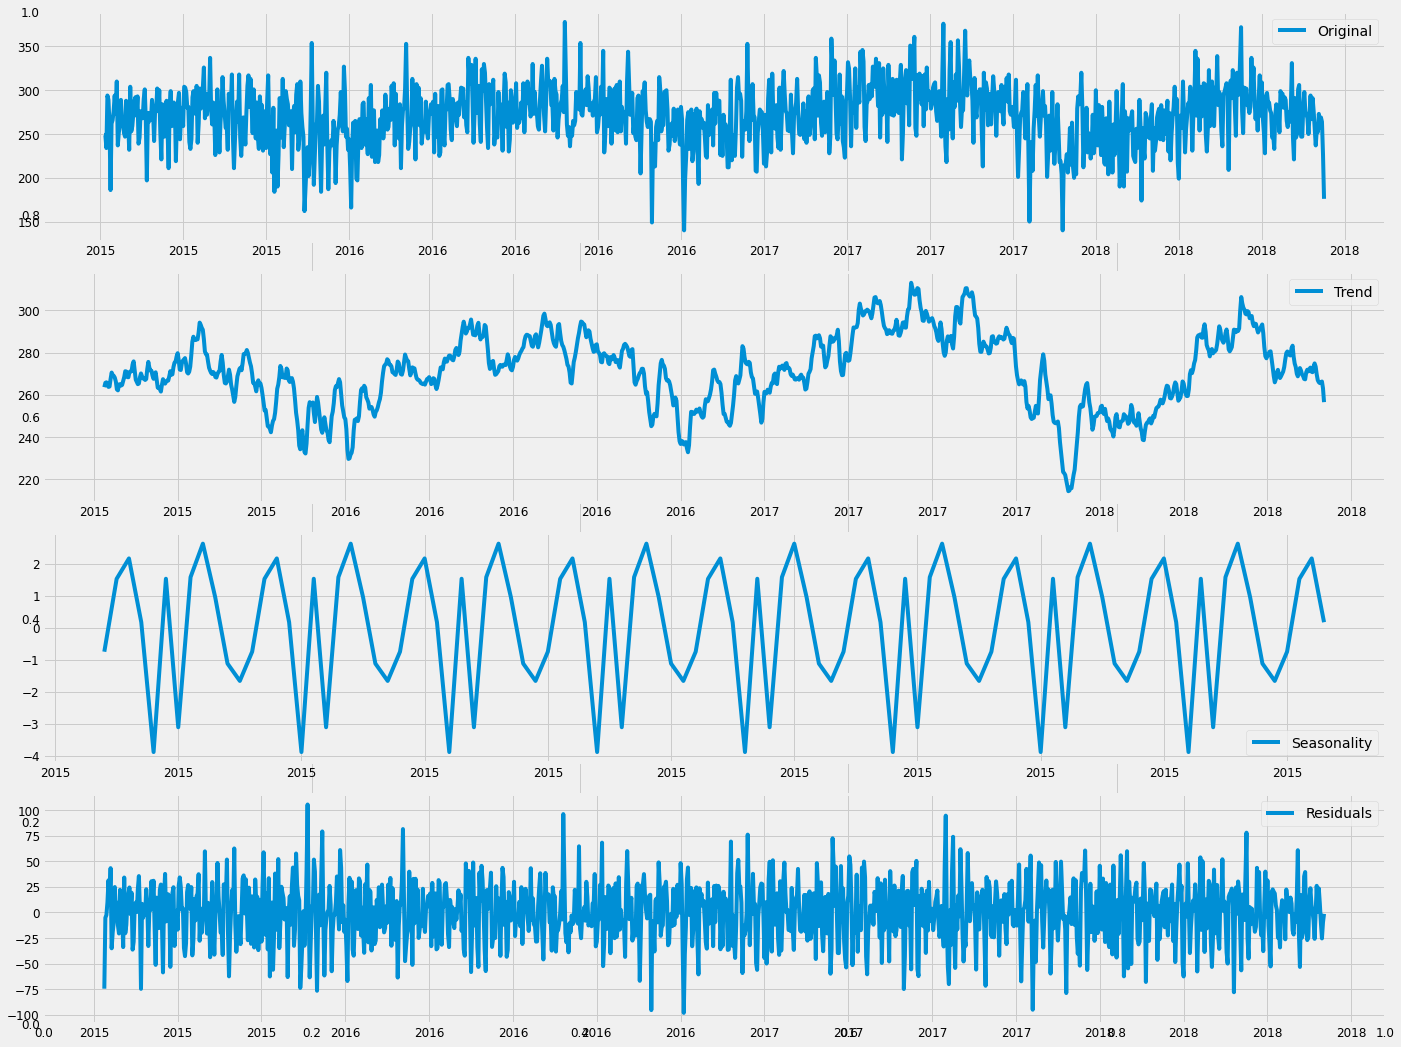

In [20]:
res = sm.tsa.seasonal_decompose(d['Count'],freq=12,model="additive")
trend = res.trend
seasonal = res.seasonal
residual = res.resid

fig,ax=plt.subplots(figsize = (20,15))
ax1 = fig.add_subplot(411)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(80))
ax1.plot(d['Count'], label='Original')
ax1.legend(loc='best')

ax2 = fig.add_subplot(412)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(80))
ax2.plot(trend, label='Trend')
ax2.legend(loc='best')

ax3 = fig.add_subplot(413)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax3.plot(seasonal[:100],label='Seasonality')
ax3.legend(loc='best')

ax4 = fig.add_subplot(414)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(80))
ax4.plot(residual, label='Residuals')
ax4.legend(loc='best')
plt.tight_layout()

In [21]:
def test_stationarity(series,mlag = 365, lag = None,):
    print('ADF Test Result')
    res = adfuller(series, maxlag = mlag, autolag = lag)
    output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
    for key, value in res[4].items():
        output['Critical Value ' + key] = value
    print(output)

In [22]:
test_stationarity(d['Count'],lag='AIC')

ADF Test Result
Test Statistic                   -2.237273
p value                           0.192997
used lag                         34.000000
Number of observations used    1142.000000
Critical Value 1%                -3.436089
Critical Value 5%                -2.864074
Critical Value 10%               -2.568119
dtype: float64


In [23]:
import seaborn as sns 

In [24]:
d1 = d.copy()
d1['Count'] = d1['Count'].diff(1)

In [25]:
d1.head()

,Date,Count
2015-06-15,2015-06-15,NaN
2015-06-16,2015-06-16,0.0
2015-06-17,2015-06-17,-15.0
2015-06-18,2015-06-18,60.0
2015-06-19,2015-06-19,-5.0


In [26]:
d1.isna().sum()

Date     0
Count    1
dtype: int64

In [27]:
d1 = d1.dropna(axis=0)

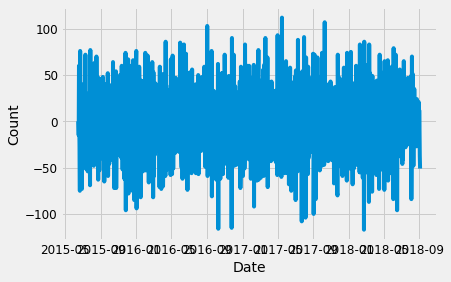

In [28]:
sns.lineplot(x="Date",y="Count",data=d1)

In [29]:
import math
print('Average= '+str(d1['Count'].mean()))
print('Std= ' + str(d1['Count'].std()))
print('SE= ' + str(d1['Count'].std()/math.sqrt(len(d1))))
print(test_stationarity(d1['Count'],lag = 'AIC'))


Average= -0.06207482993197279
Std= 37.349601593334036
SE= 1.0891364999989281
ADF Test Result
Test Statistic                -9.988185e+00
p value                        2.029010e-17
used lag                       3.300000e+01
Number of observations used    1.142000e+03
Critical Value 1%             -3.436089e+00
Critical Value 5%             -2.864074e+00
Critical Value 10%            -2.568119e+00
dtype: float64
None


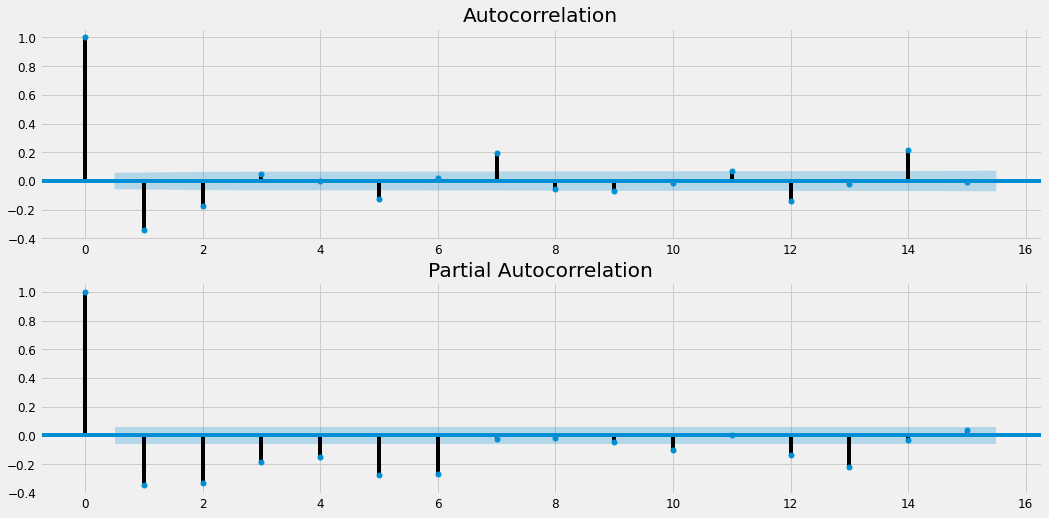

In [30]:
fig_2 = plt.figure(figsize=(16,8))
ax1_2 = fig_2.add_subplot(211)
fig_2 = plot_acf(d1["Count"],lags=15,ax=ax1_2)
ax2_2 = fig_2.add_subplot(212)
fig_2 = plot_pacf(d1["Count"],lags=15,ax=ax2_2)

In [31]:
d=c.sort_values(by="Date",ascending = True)

In [32]:
d.head()

,Date,Count
2015-06-15,2015-06-15,249
2015-06-16,2015-06-16,249
2015-06-17,2015-06-17,234
2015-06-18,2015-06-18,294
2015-06-19,2015-06-19,289


In [33]:
ts=d

In [34]:
d['Date'].max()

datetime.date(2018, 9, 3)

In [35]:
timeseries =d ['Count']
p,d,q = (4,1,2)
arima_mod = ARIMA(timeseries,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                           Results: ARIMA
Model:              ARIMA            BIC:                 11362.8143
Dependent Variable: D.Count          Log-Likelihood:      -5653.1   
Date:               2020-07-29 20:17 Scale:               1.0000    
No. Observations:   1176             Method:              css-mle   
Df Model:           7                Sample:              06-16-2015
Df Residuals:       1169                                  09-03-2018
Converged:          1.0000           S.D. of innovations: 29.586    
No. Iterations:     15.0000          HQIC:                11337.549 
AIC:                11322.2553                                      
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            -0.0037    0.0642  -0.0579  0.9539  -0.1295   0.1221
ar.L1.D.Count     0.4726    0.1516   3.1170  0.0019   0.1

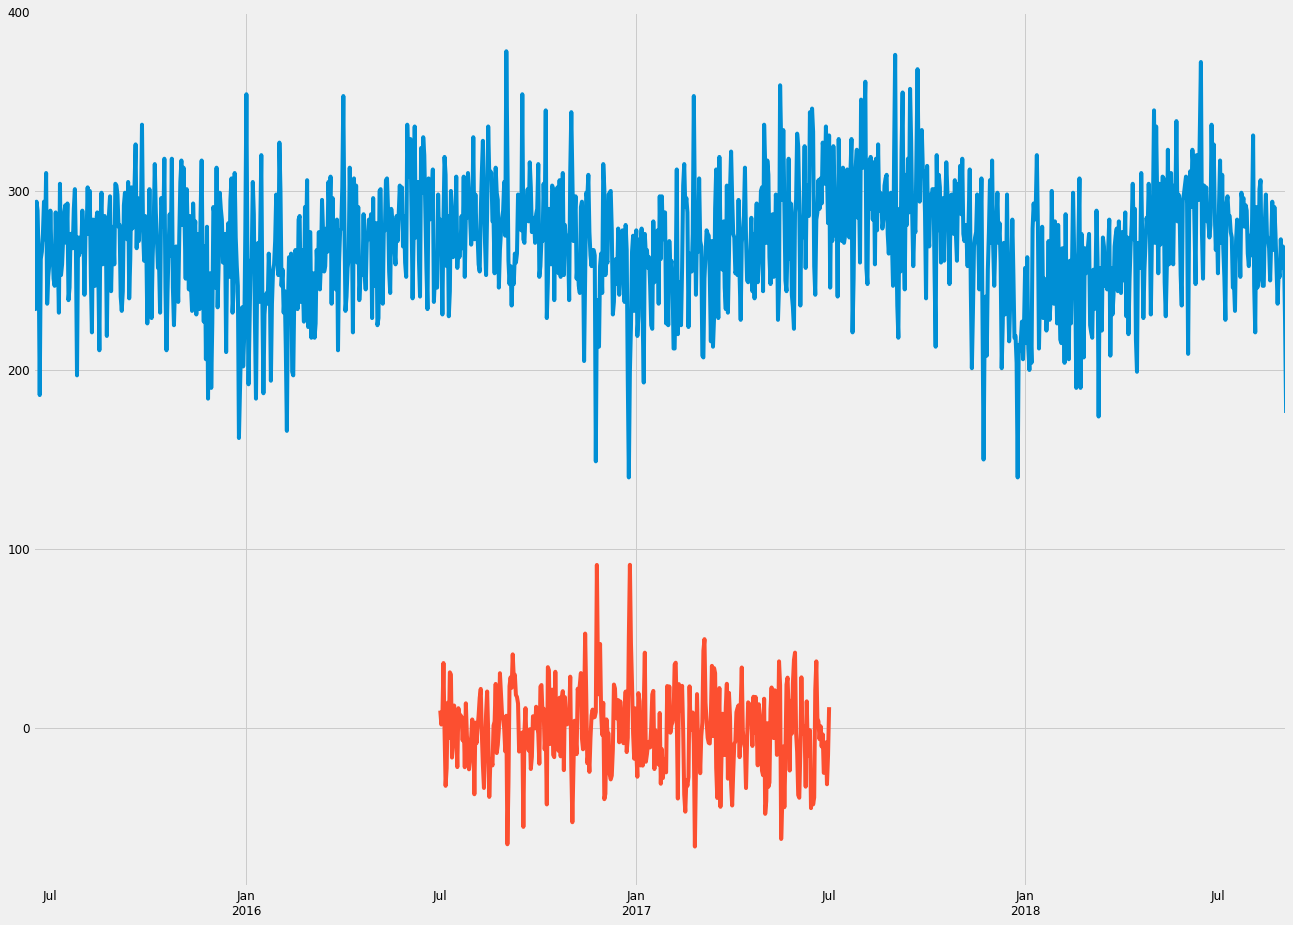

In [36]:
predict_data =arima_mod.predict(start='2016-07-01', end='2017-07-01', dynamic = False)
timeseries.index = pd.DatetimeIndex(timeseries.index)
fig, ax = plt.subplots(figsize=(20, 15))
ax = timeseries.plot(ax=ax)
predict_data.plot(ax=ax)
plt.show()

In [37]:
import itertools

In [38]:
p = d = q = range(0, 2)
 
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
 
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [39]:
res = pd.DataFrame(columns = ['order', 'seasonal_order', 'AIC'])

In [41]:
ts.head()

,Date,Count
2015-06-15,2015-06-15,249
2015-06-16,2015-06-16,249
2015-06-17,2015-06-17,234
2015-06-18,2015-06-18,294
2015-06-19,2015-06-19,289


In [40]:
Y=ts['Count']

In [42]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue 
                       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:16533.85538767266
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:15153.931433757061
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:11816.323155561295


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:11137.767011602626
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:11821.764132460456


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:11213.617977016507
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:11395.242324195846


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:11136.958515508464
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:15139.391125967686


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:14222.22663497144
ARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:11754.790507938978


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:11050.690685519352


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:11836.510622060949
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:11120.847247219925


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:11349.050020162407


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:11051.006527593994
ARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:11844.26607639678


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:11738.077978989968
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 - AIC:12323.456537039407


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 7)7 - AIC:11436.133581166723
ARIMA(0, 1, 0)x(1, 0, 0, 7)7 - AIC:11732.987788730337


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 7)7 - AIC:11508.281389277385
ARIMA(0, 1, 0)x(1, 1, 0, 7)7 - AIC:11912.440860975446


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 7)7 - AIC:11435.581135139057
ARIMA(0, 1, 1)x(0, 0, 0, 7)7 - AIC:11356.998783749517


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 7)7 - AIC:11259.59539337307


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 7)7 - AIC:11805.853376316589


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 7)7 - AIC:10949.78250652954


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 7)7 - AIC:11264.738433095983


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 7)7 - AIC:11020.35950001912


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 7)7 - AIC:11395.461302416792


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 7)7 - AIC:10943.839729532558
ARIMA(1, 0, 0)x(0, 0, 0, 7)7 - AIC:11849.628968795554


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 7)7 - AIC:11741.94735216461
ARIMA(1, 0, 0)x(0, 1, 0, 7)7 - AIC:11759.956381543208


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 7)7 - AIC:11038.535303338293


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 7)7 - AIC:11726.48911335085


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 7)7 - AIC:11106.794001063667
ARIMA(1, 0, 0)x(1, 1, 0, 7)7 - AIC:11335.417276138469


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 7)7 - AIC:11034.344119731766


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 7)7 - AIC:11368.370634256637


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 7)7 - AIC:11270.850518135867
ARIMA(1, 0, 1)x(0, 1, 0, 7)7 - AIC:11751.258947981398


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 7)7 - AIC:10948.44381024403


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 7)7 - AIC:11266.651590978408


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 7)7 - AIC:11019.551738193
ARIMA(1, 0, 1)x(1, 1, 0, 7)7 - AIC:11334.433615124042


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 7)7 - AIC:10943.537343698148
ARIMA(1, 1, 0)x(0, 0, 0, 7)7 - AIC:11699.553654829271


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 7)7 - AIC:11579.960534792768
ARIMA(1, 1, 0)x(0, 1, 0, 7)7 - AIC:12114.19427395763


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 7)7 - AIC:11226.67596361323
ARIMA(1, 1, 0)x(1, 0, 0, 7)7 - AIC:11557.511378075404


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 7)7 - AIC:11299.922541789358


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 7)7 - AIC:11682.26129749427


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 7)7 - AIC:11226.448777146627
ARIMA(1, 1, 1)x(0, 0, 0, 7)7 - AIC:11312.683896758022


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 7)7 - AIC:11210.757154643516


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 7)7 - AIC:11749.377762214053


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 7)7 - AIC:10915.257205074216


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 7)7 - AIC:11204.781420734642


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 7)7 - AIC:10985.903774965092


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 7)7 - AIC:11334.770958559442


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 7)7 - AIC:10914.09982080955


In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model=SARIMAX(ts['Count'], order=(1,1,1), seasonal_order=(1,1,1, 7)).fit()
summary = model.summary()
print(summary)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                             Count   No. Observations:                 1177
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5495.717
Date:                           Wed, 29 Jul 2020   AIC                          11001.434
Time:                                   20:18:02   BIC                          11026.754
Sample:                               06-15-2015   HQIC                         11010.984
                                    - 09-03-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1872      0.031      6.057      0.000       0.127       0.248
ma.L1         -0.9287      0.013    -72.222

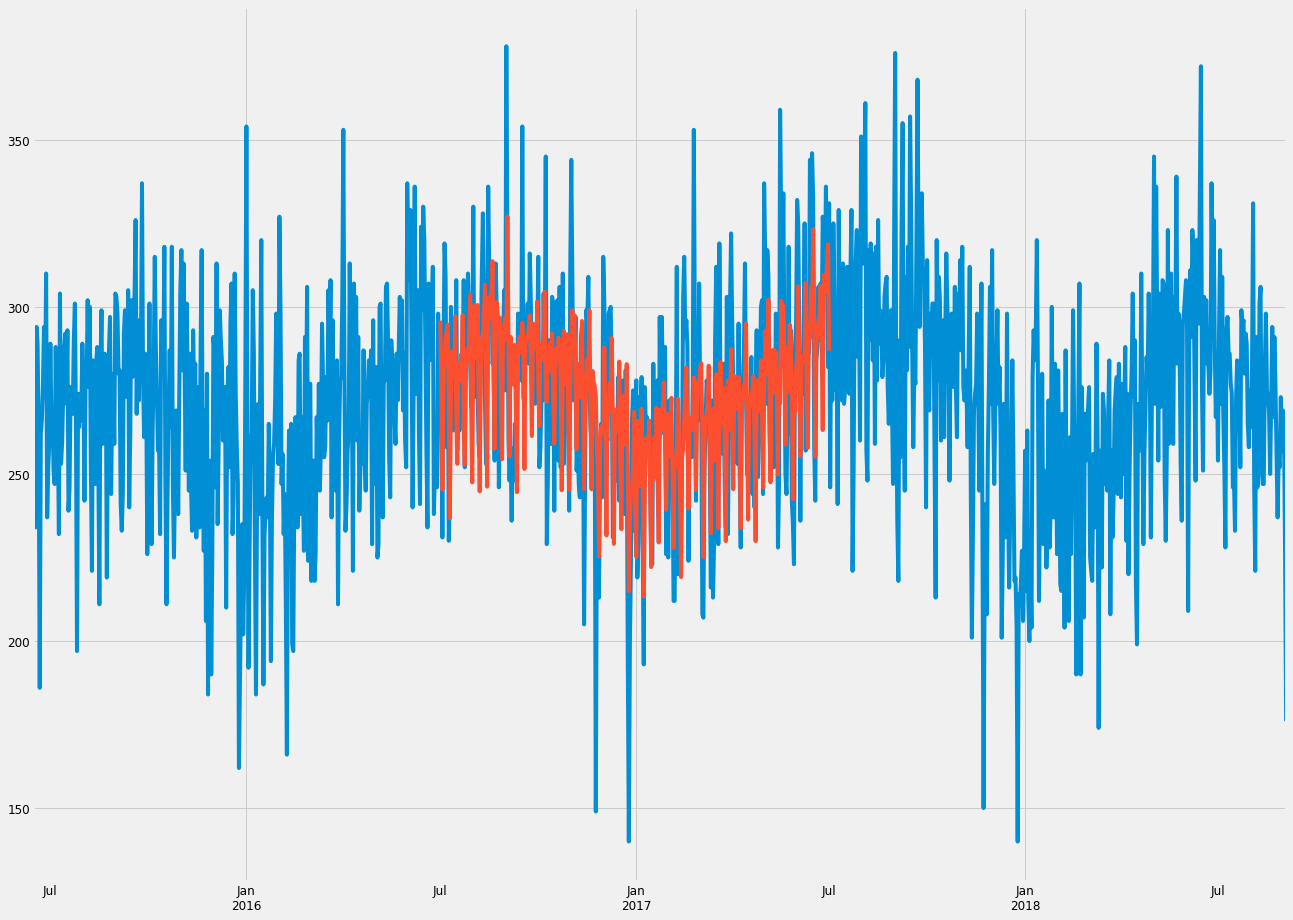

In [45]:
predict_data = model.predict(start='2016-07-01', end='2017-07-01', dynamic = False)
timeseries.index = pd.DatetimeIndex(timeseries.index)
fig, ax = plt.subplots(figsize=(20, 15))
ax = timeseries.plot(ax=ax)
predict_data.plot(ax=ax)
plt.show()

In [46]:
pred_uc = model.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

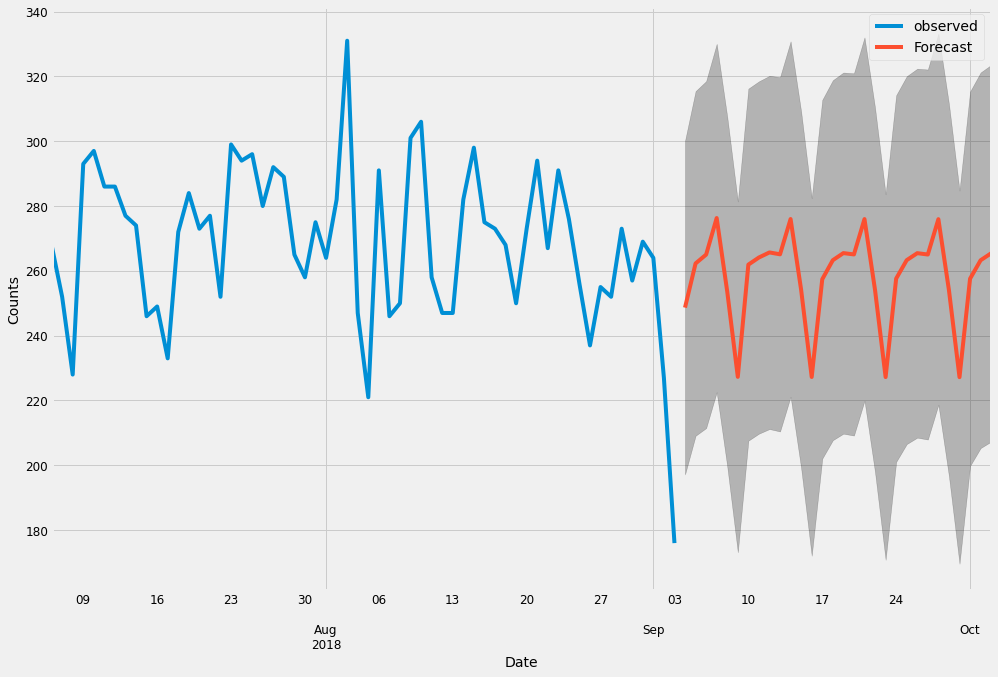

In [47]:
ax = ts['Count'][-60:].plot(label='observed', figsize=(15, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
 
plt.legend()
plt.show()

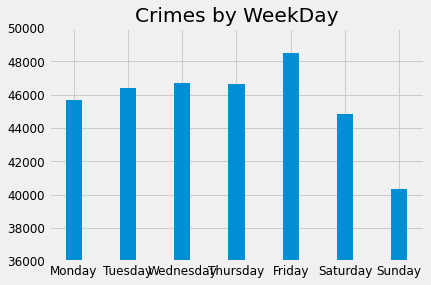

In [48]:
week = createdf("Week",df["DAY_OF_WEEK"].value_counts().index,"Count",df["DAY_OF_WEEK"].value_counts())
week=week.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.bar(week["Week"] , week["Count"], width=0.3)
plt.ylim(36000, 50000)
plt.title('Crimes by WeekDay')
plt.show()